In [1]:
import cv2
import numpy as np
import os

In [2]:
# 读取图片并且进行预处理
def processImg(path):
    '''
    path: 图片路径
    '''
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)      # 转换为灰度图
    # gray = cv2.GaussianBlur(gray, (3, 3), 1)          # 高斯滤波
    ret, th1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )  # 阈值分割
#     ret, th1 = cv2.threshold(gray, 0, 255, cv2.THRESH_TRIANGLE |  cv2.THRESH_BINARY )  # 阈值分割
    # ret, th1 = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)  # 阈值分割
    # 开闭运算去除噪点
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))  # cv2.getStructuringElement( )
    # 返回指定形状和尺寸的结构元素。矩形：MORPH_RECT;交叉形：MORPH_CROSS;椭圆形：MORPH_ELLIPSE; (3,3)表示内核的尺寸
    th1 = cv2.morphologyEx(th1, cv2.MORPH_OPEN, kernel)  # 开运算
    th1 = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel) # 闭运算
    edge = cv2.Canny(th1, 10, 255) # 边缘检测，

    return th1, img, edge

In [3]:
# 利用轮廓处理获取roi
def getRoi(img, binary):
    '''
    img: 原图
    binary: 预处理后得到的canny边缘
    '''
    # 寻找轮廓
    contours, _ = cv2.findContours(
        binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # 查找检测物体的轮廓

    roi_list = []

    # 判断出圆形区域
    for cnt in range(len(contours)):
        area = cv2.contourArea(contours[cnt])   # 轮廓面积
        # 判断提取所需的轮廓，经验值需要调试获取
        if 10 < area < 100000:
            # 获取外接矩形的值
            x,y,w,h = cv2.boundingRect(contours[cnt])  #用一个最小的矩形，把找到的形状包起来，返回四个值，分别是x，y，w，h；x，y是矩阵左上点的坐标，w，h是矩阵的宽和高
            roi_list.append((x,y,w,h))
            cv2.drawContours(img, [contours[cnt]], 0, (255,0,0), 2)  # 第一个参数是指明在哪幅图像上绘制轮廓；image为三通道才能显示轮廓
            cv2.rectangle(img, (x,y),(x+w, y+h),(0,255,0),2)  # 然后利用cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)画出矩行

    return img, roi_list

In [4]:
# Save the roi
def saveRoi(src, roi_list):
    x, y, w, h = roi_list[0]
    roi = src[y-10:y+h+10, x-10:x+w+10]
    return roi

In [14]:
def area_count(img):
    area = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 255:
                area += 1
    print(area)
    return area

In [28]:
if __name__ == '__main__':
    for k in range(30):
        area_list = [0 for i in range(1000)]
        path=r"I:\__data__\XIMEA_2020-11-13\5_0.25\layer_"+str(k+1)  #待读取的文件夹
        path_list=os.listdir(path)
#         print(path_list)
    #     path_list.sort() #对读取的路径进行排序
        for i in range(len(path_list)):
            # th1, img, edge = processImg("K://hanjia//roi//ROI.jpg")
            path = r"I:/__data__/XIMEA_2020-11-13/5_0.25/layer_"+str(k+1)+"/"+str(path_list[i])
#             print(path)
    #         os.makedirs(r"E:/10/400-7/roo/"+str(i))
            th1, img, edge = processImg(path)
            # copy img
#             area_list[i] = area_count(th1)
            
            txtName = "layer_"+str(k+1)+".txt"
            f=open(txtName, "a+")
            f.write(str(area_list[i])+"\n")
            f.close()
            
#             src = img.copy()
            # 获取roi
    #         img, roi_list = getRoi(img, edge)

            # 保存roi
    #         roi = saveRoi(src, roi_list)

        # Display images.
    #     cv2.imshow("Thresholded Image", th1)
            #cv2.imwrite(r"E:/10/400-7/ROI/"+str(i)+"/th1.jpg", th1)

    #     cv2.imshow("edge", edge)
            #cv2.imwrite(r"E:/10/400-7/ROI/"+str(i)+"/edge.jpg", edge)

    #     cv2.imshow("roi image", img)
            file_path = r"I:\__data__\XIMEA_2020-11-13\5_0.25\layer_"+str(k+1)+"_area"
            if not os.path.exists(file_path): # 判断文件夹是否已经存在
                os.mkdir(file_path)
            sav_path = r"I:\__data__\XIMEA_2020-11-13\5_0.25\layer_"+str(k+1)+"_area\\area_"+str(i)+".jpg"
            print(sav_path)
            cv2.imwrite(sav_path, th1)

#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
#         print(area_list)

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_0.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_1.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_2.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_3.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_4.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_5.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_6.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_7.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_8.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.2

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_139.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_140.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_141.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_142.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_143.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_144.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_145.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_146.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_147.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_148.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_149.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_150.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_151.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_152.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_153.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_154.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_287.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_288.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_289.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_290.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_291.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_292.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_293.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_294.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_302.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_430.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_431.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_432.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_433.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_434.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_435.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_436.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_445.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_563.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_564.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_565.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_566.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_567.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_568.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_569.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_570.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_571.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_572.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_573.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_574.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_575.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_576.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_577.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_578.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_709.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_710.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_711.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_712.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_713.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_714.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_715.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_716.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_717.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_718.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_719.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_720.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_721.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_722.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_723.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_1_area\area_724.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_55.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_56.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_57.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_58.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_59.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_60.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_61.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_62.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_63.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_64.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_65.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_66.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_67.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_68.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_69.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_70.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_188.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_189.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_190.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_191.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_192.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_193.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_194.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_195.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_196.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_197.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_198.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_199.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_200.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_201.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_202.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_203.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_328.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_329.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_330.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_331.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_332.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_333.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_334.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_335.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_336.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_337.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_338.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_339.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_340.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_341.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_342.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_343.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_475.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_476.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_477.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_478.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_479.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_480.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_481.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_482.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_483.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_484.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_485.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_486.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_487.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_488.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_489.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_490.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_612.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_613.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_614.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_615.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_616.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_617.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_618.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_619.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_620.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_621.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_622.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_623.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_624.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_625.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_626.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_627.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_759.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_760.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_761.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_762.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_763.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_764.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_765.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_766.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_767.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_768.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_769.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_770.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_771.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_772.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_2_area\area_773.jpg
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_76.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_77.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_78.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_79.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_80.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_81.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_82.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_83.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_84.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_85.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_86.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_87.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_88.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_89.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_90.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_91.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_212.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_213.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_214.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_215.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_216.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_217.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_218.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_219.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_220.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_221.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_222.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_223.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_224.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_225.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_226.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_227.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_355.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_356.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_357.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_358.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_359.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_360.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_361.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_362.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_363.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_364.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_365.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_366.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_367.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_368.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_369.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_370.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_500.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_501.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_502.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_503.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_504.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_505.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_506.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_507.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_508.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_509.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_510.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_511.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_512.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_513.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_514.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_515.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_634.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_635.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_636.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_637.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_638.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_639.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_640.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_641.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_642.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_643.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_644.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_645.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_646.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_647.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_648.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_3_area\area_649.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_43.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_44.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_45.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_46.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_47.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_48.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_49.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_50.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_51.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_52.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_53.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_54.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_55.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_56.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_57.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_58.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_182.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_183.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_184.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_185.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_186.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_187.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_188.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_189.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_190.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_191.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_192.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_193.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_194.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_195.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_196.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_197.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_317.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_318.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_319.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_320.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_321.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_322.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_323.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_324.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_325.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_326.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_327.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_328.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_329.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_330.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_331.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_332.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_456.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_457.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_458.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_459.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_460.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_461.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_462.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_463.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_464.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_465.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_597.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_598.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_599.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_600.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_721.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_722.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_723.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_724.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_725.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_726.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_727.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_728.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_729.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_730.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_731.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_732.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_733.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_734.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_735.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_4_area\area_736.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_39.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_40.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_41.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_42.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_43.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_44.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_45.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_46.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_47.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_48.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_49.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_50.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_51.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_52.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_53.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_54.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_184.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_185.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_186.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_187.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_188.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_189.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_190.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_191.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_192.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_193.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_194.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_195.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_196.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_197.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_198.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_199.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_332.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_333.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_334.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_335.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_336.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_337.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_338.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_339.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_340.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_341.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_342.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_343.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_344.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_345.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_346.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_347.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_466.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_467.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_468.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_469.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_470.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_471.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_472.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_473.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_474.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_475.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_476.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_477.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_478.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_479.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_480.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_481.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_598.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_599.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_600.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_601.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_602.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_603.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_604.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_605.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_606.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_607.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_608.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_609.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_610.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_611.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_612.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_613.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_746.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_747.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_748.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_749.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_750.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_751.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_752.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_753.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_754.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_755.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_756.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_757.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_758.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_759.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_760.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_5_area\area_761.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_64.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_65.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_66.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_67.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_68.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_69.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_70.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_71.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_72.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_73.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_74.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_75.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_76.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_77.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_78.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_79.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_211.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_212.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_213.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_214.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_215.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_216.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_217.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_218.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_219.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_220.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_221.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_222.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_223.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_224.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_225.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_226.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_350.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_351.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_352.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_353.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_354.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_355.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_356.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_357.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_358.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_359.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_360.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_361.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_362.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_363.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_364.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_365.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_486.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_487.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_488.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_489.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_490.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_491.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_492.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_493.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_494.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_495.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_496.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_497.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_498.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_499.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_500.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_501.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_624.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_625.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_626.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_627.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_628.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_629.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_630.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_631.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_632.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_633.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_634.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_635.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_636.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_637.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_638.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_639.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_756.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_757.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_758.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_759.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_760.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_761.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_762.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_763.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_764.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_765.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_766.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_767.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_768.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_769.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_770.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_6_area\area_771.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_8.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_23.jpg
I:\__data__\XIMEA_2020-11-

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_156.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_157.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_171.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_311.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_312.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_456.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_457.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_597.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_598.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_599.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_600.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_601.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_730.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_731.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_732.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_733.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_734.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_735.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_736.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_737.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_738.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_739.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_740.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_741.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_742.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_743.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_744.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_7_area\area_745.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_55.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_56.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_57.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_58.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_59.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_60.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_61.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_62.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_63.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_64.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_65.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_66.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_67.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_68.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_69.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_70.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_198.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_199.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_200.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_201.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_202.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_203.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_204.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_205.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_206.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_207.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_208.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_209.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_210.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_211.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_212.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_213.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_351.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_352.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_353.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_354.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_355.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_356.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_357.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_358.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_359.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_360.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_361.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_362.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_363.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_364.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_365.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_366.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_486.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_487.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_488.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_489.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_490.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_491.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_492.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_493.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_494.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_495.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_496.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_497.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_498.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_499.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_500.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_501.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_628.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_629.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_630.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_631.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_632.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_633.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_634.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_635.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_636.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_637.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_638.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_639.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_640.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_641.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_642.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_8_area\area_643.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_28.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_29.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_30.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_31.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_32.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_33.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_34.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_35.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_36.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_37.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_38.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_39.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_40.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_41.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_42.jpg
I:\__data__\XIMEA_2020-1

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_173.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_174.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_175.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_176.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_177.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_310.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_456.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_457.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_458.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_597.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_598.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_599.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_600.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_9_area\area_601.jpg
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_81.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_82.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_83.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_84.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_85.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_86.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_87.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_88.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_89.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_90.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_91.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_92.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_93.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_94.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_95.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_96.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_227.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_228.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_229.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_230.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_231.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_232.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_233.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_234.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_235.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_236.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_237.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_238.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_239.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_240.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_241.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_366.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_367.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_368.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_369.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_370.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_371.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_372.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_373.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_374.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_375.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_376.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_377.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_378.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_379.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_380.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_509.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_510.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_511.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_512.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_513.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_514.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_515.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_516.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_517.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_518.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_519.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_520.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_521.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_522.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_523.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_649.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_650.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_651.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_652.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_653.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_654.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_655.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_656.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_657.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_658.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_659.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_660.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_661.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_662.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_663.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_10_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_53.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_54.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_55.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_56.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_57.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_58.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_59.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_60.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_61.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_62.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_63.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_64.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_65.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_66.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_67.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_68.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_188.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_189.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_190.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_191.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_192.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_193.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_194.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_195.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_196.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_197.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_198.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_199.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_200.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_201.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_202.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_320.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_321.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_322.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_323.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_324.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_325.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_326.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_327.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_328.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_329.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_330.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_331.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_332.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_333.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_334.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_467.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_468.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_469.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_470.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_471.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_472.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_473.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_474.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_475.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_476.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_477.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_478.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_479.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_480.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_481.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_610.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_611.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_612.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_613.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_614.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_615.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_616.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_617.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_618.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_619.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_620.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_621.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_622.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_623.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_624.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_11_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_25.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_26.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_28.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_29.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_30.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_31.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_32.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_33.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_34.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_35.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_36.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_37.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_38.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_173.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_174.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_175.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_294.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_576.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_577.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_578.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_579.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_580.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_581.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_713.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_714.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_715.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_716.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_717.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_718.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_719.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_720.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_721.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_722.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_723.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_724.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_725.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_726.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_727.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_848.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_849.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_850.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_851.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_852.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_853.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_854.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_855.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_856.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_857.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_858.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_12_area\area_859.jpg
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_77.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_78.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_79.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_80.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_81.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_82.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_83.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_84.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_85.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_86.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_87.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_88.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_89.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_90.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_91.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_92.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_222.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_223.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_224.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_225.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_226.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_227.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_228.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_229.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_230.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_231.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_232.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_233.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_234.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_235.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_236.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_361.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_362.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_363.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_364.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_365.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_366.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_367.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_368.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_369.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_370.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_371.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_372.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_373.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_374.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_375.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_499.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_500.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_501.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_502.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_503.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_504.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_505.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_506.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_507.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_508.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_509.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_510.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_511.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_512.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_513.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_636.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_637.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_638.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_639.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_640.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_641.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_642.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_643.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_644.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_645.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_646.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_647.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_648.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_649.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_650.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_13_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_4.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_5.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_6.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_7.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_8.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_19.jpg
I:\__data__\XI

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_135.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_136.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_137.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_138.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_139.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_140.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_141.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_142.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_143.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_144.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_145.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_146.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_147.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_148.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_149.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_276.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_277.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_278.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_279.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_280.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_281.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_282.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_283.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_284.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_285.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_286.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_287.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_288.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_289.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_290.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_409.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_410.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_411.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_412.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_413.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_414.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_415.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_416.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_417.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_418.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_419.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_420.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_421.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_422.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_423.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_552.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_553.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_554.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_555.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_556.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_557.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_558.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_559.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_560.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_561.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_562.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_563.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_564.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_565.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_566.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_684.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_685.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_686.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_687.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_688.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_689.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_690.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_691.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_692.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_693.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_694.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_695.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_696.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_697.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_698.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_14_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_8.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_23.jpg
I:\__data_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_151.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_152.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_153.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_154.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_155.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_156.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_157.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_289.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_290.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_291.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_292.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_293.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_294.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_434.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_435.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_436.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_572.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_573.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_574.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_575.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_576.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_577.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_578.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_579.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_580.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_581.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_15_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_54.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_55.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_56.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_57.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_58.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_59.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_60.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_61.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_62.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_63.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_64.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_65.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_66.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_67.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_68.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_69.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_189.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_190.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_191.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_192.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_193.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_194.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_195.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_196.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_197.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_198.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_199.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_200.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_201.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_202.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_203.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_328.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_329.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_330.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_331.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_332.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_333.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_334.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_335.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_336.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_337.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_338.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_339.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_340.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_341.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_342.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_465.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_466.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_467.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_468.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_469.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_470.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_471.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_472.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_473.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_474.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_475.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_476.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_477.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_478.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_479.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_16_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_43.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_44.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_45.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_46.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_47.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_48.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_49.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_50.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_51.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_52.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_53.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_54.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_55.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_56.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_57.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_58.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_174.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_175.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_176.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_177.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_178.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_179.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_180.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_181.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_182.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_183.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_184.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_185.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_186.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_187.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_188.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_311.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_312.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_313.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_314.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_315.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_316.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_317.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_318.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_456.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_457.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_458.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_459.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_460.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_461.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_462.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_580.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_581.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_17_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_0.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_1.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_2.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_3.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_4.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_5.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_6.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_7.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_8.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_15.jpg
I:\__data__\XIMEA_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_135.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_136.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_137.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_138.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_139.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_140.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_141.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_142.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_143.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_144.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_145.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_146.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_147.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_148.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_149.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_278.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_279.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_280.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_281.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_282.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_283.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_284.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_285.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_286.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_287.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_288.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_289.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_290.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_291.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_292.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_413.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_414.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_415.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_416.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_417.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_418.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_419.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_420.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_421.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_422.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_423.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_424.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_425.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_426.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_427.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_558.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_559.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_560.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_561.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_562.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_563.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_564.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_565.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_566.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_567.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_568.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_569.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_570.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_571.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_572.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_688.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_689.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_690.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_691.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_692.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_693.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_694.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_695.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_696.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_697.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_698.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_699.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_700.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_701.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_702.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_18_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_24.jpg
I:\__data

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_155.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_156.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_157.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_291.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_292.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_293.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_294.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_426.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_427.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_428.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_429.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_430.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_431.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_432.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_433.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_434.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_435.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_436.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_560.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_561.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_562.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_563.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_564.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_565.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_566.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_567.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_568.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_569.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_570.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_571.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_572.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_573.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_574.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_19_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_25.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_26.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_28.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_29.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_30.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_31.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_173.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_174.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_175.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_176.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_177.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_178.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_313.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_314.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_315.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_316.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_317.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_318.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_319.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_320.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_321.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_322.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_323.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_324.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_325.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_326.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_327.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_456.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_457.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_458.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_459.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_460.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_461.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_20_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_28.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_29.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_30.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_31.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_32.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_33.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_34.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_35.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_36.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_37.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_38.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_39.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_40.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_41.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_42.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_173.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_174.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_175.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_176.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_177.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_178.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_179.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_180.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_181.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_182.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_183.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_184.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_311.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_312.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_313.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_314.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_315.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_431.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_432.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_433.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_434.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_435.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_436.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_571.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_572.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_573.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_574.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_575.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_576.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_577.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_578.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_579.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_580.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_581.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_704.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_705.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_706.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_707.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_708.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_709.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_710.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_711.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_712.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_713.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_714.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_715.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_716.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_717.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_718.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_848.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_849.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_850.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_851.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_852.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_853.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_854.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_855.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_856.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_857.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_858.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_21_area\area_859.jpg
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_87.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_88.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_89.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_90.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_91.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_92.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_93.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_94.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_95.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_96.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_97.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_98.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_99.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_100.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_101.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_102.jpg
I:\__

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_222.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_223.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_224.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_225.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_226.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_227.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_228.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_229.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_230.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_231.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_232.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_233.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_234.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_235.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_236.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_358.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_359.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_360.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_361.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_362.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_363.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_364.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_365.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_366.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_367.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_368.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_369.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_370.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_371.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_372.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_508.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_509.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_510.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_511.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_512.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_513.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_514.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_515.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_516.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_517.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_518.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_519.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_520.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_521.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_522.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_650.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_651.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_652.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_653.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_654.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_655.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_656.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_657.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_658.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_659.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_660.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_661.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_662.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_663.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_664.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_22_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_25.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_26.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_28.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_173.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_174.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_175.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_311.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_312.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_313.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_434.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_435.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_436.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_575.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_576.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_577.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_578.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_579.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_580.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_581.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_23_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_8.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_9.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_23.jpg
I:\__data_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_154.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_155.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_156.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_157.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_311.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_312.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_313.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_314.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_315.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_316.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_597.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_598.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_599.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_24_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_80.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_81.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_82.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_83.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_84.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_85.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_86.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_87.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_88.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_89.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_90.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_91.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_92.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_93.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_94.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_95.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_228.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_229.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_230.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_231.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_232.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_233.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_234.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_235.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_236.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_237.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_238.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_239.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_240.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_241.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_242.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_366.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_367.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_368.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_369.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_370.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_371.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_372.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_373.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_374.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_375.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_376.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_377.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_378.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_379.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_380.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_512.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_513.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_514.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_515.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_516.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_517.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_518.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_519.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_520.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_521.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_522.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_523.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_524.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_525.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_526.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_25_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_25.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_26.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_28.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_29.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_30.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_31.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_32.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_157.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_311.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_312.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_313.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_314.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_315.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_316.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_453.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_454.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_455.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_456.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_457.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_458.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_459.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_460.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_461.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_462.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_597.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_598.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_599.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_600.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_601.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_602.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_734.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_735.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_736.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_737.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_738.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_739.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_740.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_741.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_742.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_743.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_744.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_745.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_746.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_747.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_748.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_26_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_25.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_26.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_27.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_28.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_29.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_30.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_31.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_32.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_306.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_307.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_308.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_309.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_310.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_433.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_434.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_435.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_436.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_573.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_574.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_575.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_576.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_577.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_578.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_579.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_580.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_581.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_27_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_25.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_26.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_173.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_291.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_292.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_293.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_294.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_304.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_305.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_452.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_597.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_28_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_70.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_71.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_72.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_73.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_74.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_75.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_76.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_77.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_78.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_79.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_80.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_81.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_82.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_83.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_84.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_85.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_205.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_206.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_207.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_208.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_209.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_210.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_211.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_212.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_213.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_214.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_215.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_216.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_217.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_218.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_219.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_355.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_356.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_357.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_358.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_359.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_360.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_361.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_362.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_363.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_364.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_365.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_366.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_367.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_368.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_369.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_504.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_505.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_506.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_507.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_508.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_509.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_510.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_511.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_512.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_513.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_514.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_515.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_516.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_517.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_518.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_29_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_10.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_11.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_12.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_13.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_14.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_15.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_16.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_17.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_18.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_19.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_20.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_21.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_22.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_23.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_24.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_25.jpg
I:\__dat

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_158.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_159.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_160.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_161.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_162.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_163.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_164.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_165.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_166.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_167.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_168.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_169.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_170.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_171.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_172.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_289.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_290.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_291.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_292.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_293.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_294.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_295.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_296.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_297.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_298.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_299.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_300.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_301.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_302.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_303.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_437.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_438.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_439.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_440.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_441.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_442.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_443.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_444.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_445.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_446.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_447.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_448.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_449.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_450.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_451.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_

I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_582.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_583.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_584.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_585.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_586.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_587.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_588.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_589.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_590.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_591.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_592.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_593.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_594.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_595.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_596.jpg
I:\__data__\XIMEA_2020-11-13\5_0.25\layer_30_area\area_

In [60]:
area_alllist = []
for i in range(30):
    txtName = "layer_"+str(i+1)+".txt"
    f=open(txtName, "r")
    for line in f:
        area_alllist.append(line)
    f.close()
print(area_alllist)


txtName = "layer_all.txt"
f=open(txtName, "a+")
for i in area_alllist:
    f.write(str(i).rstrip('\n'))
f.close()

['401\n', '321\n', '291\n', '26544\n', '289\n', '284\n', '358\n', '410\n', '397\n', '273\n', '347\n', '368\n', '379\n', '533\n', '317\n', '26695\n', '296\n', '27129\n', '27293\n', '26684\n', '25195\n', '25836\n', '25665\n', '26403\n', '27861\n', '28152\n', '26289\n', '28253\n', '26628\n', '26630\n', '26745\n', '27343\n', '384\n', '26241\n', '26235\n', '27381\n', '27675\n', '28029\n', '27885\n', '28047\n', '28631\n', '28267\n', '28406\n', '28468\n', '28875\n', '26489\n', '28387\n', '25592\n', '26361\n', '26614\n', '27885\n', '28972\n', '28823\n', '27676\n', '27557\n', '27370\n', '28020\n', '25653\n', '27010\n', '227\n', '378\n', '252\n', '26389\n', '27021\n', '27144\n', '26353\n', '28563\n', '293\n', '25943\n', '252\n', '22889\n', '26587\n', '397\n', '1215\n', '25938\n', '26318\n', '27100\n', '28819\n', '28290\n', '27263\n', '26937\n', '28665\n', '26938\n', '28754\n', '439\n', '850\n', '1651\n', '1231\n', '27981\n', '28033\n', '26719\n', '27437\n', '27694\n', '399\n', '465\n', '496\n', 

[0.00000000e+00 1.41502759e-03 2.83005519e-03 ... 2.99971699e+01
 2.99985850e+01 3.00000000e+01]
[401, 321, 291, 26544, 289, 284, 358, 410, 397, 273, 347, 368, 379, 533, 317, 26695, 296, 27129, 27293, 26684, 25195, 25836, 25665, 26403, 27861, 28152, 26289, 28253, 26628, 26630, 26745, 27343, 384, 26241, 26235, 27381, 27675, 28029, 27885, 28047, 28631, 28267, 28406, 28468, 28875, 26489, 28387, 25592, 26361, 26614, 27885, 28972, 28823, 27676, 27557, 27370, 28020, 25653, 27010, 227, 378, 252, 26389, 27021, 27144, 26353, 28563, 293, 25943, 252, 22889, 26587, 397, 1215, 25938, 26318, 27100, 28819, 28290, 27263, 26937, 28665, 26938, 28754, 439, 850, 1651, 1231, 27981, 28033, 26719, 27437, 27694, 399, 465, 496, 26338, 25192, 522, 741, 463, 25569, 24994, 25630, 26219, 563, 471, 24810, 25116, 27089, 601, 768, 651, 25326, 25143, 23818, 24856, 27095, 26044, 27295, 426, 435, 25682, 561, 732, 624, 486, 440, 442, 26616, 26422, 27892, 29378, 27653, 26799, 27295, 28929, 27876, 27420, 26947, 27367, 2621

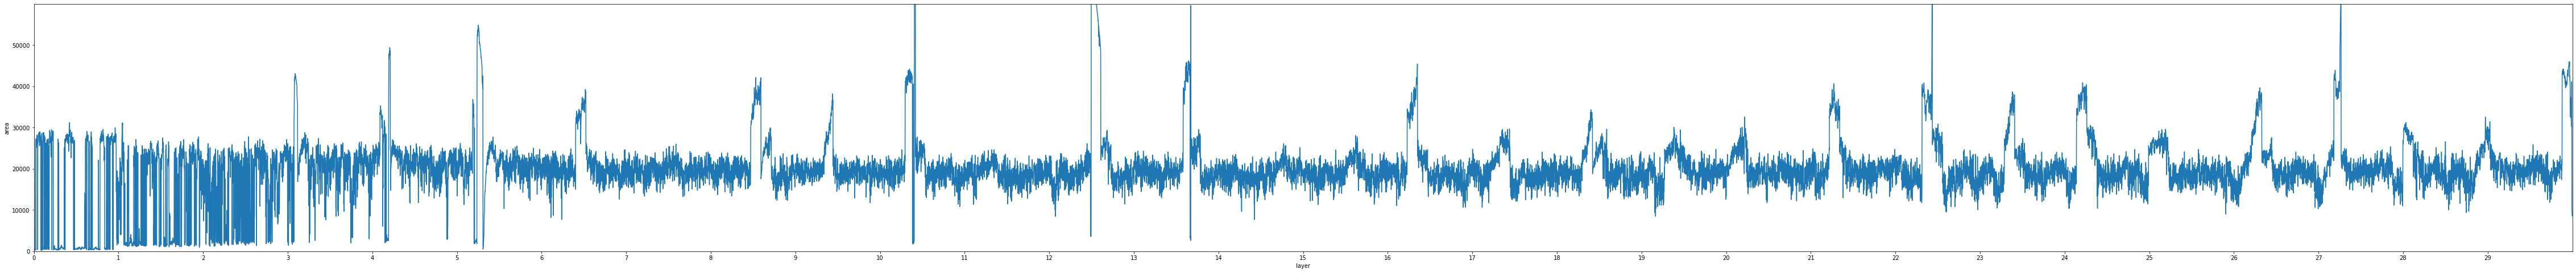

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 8))
x = np.linspace(0,30,len(area_alllist))
print(x)
y = [line.rstrip('\n') for line in area_alllist]
y = list(map(int, y))
print(y)
plt.plot(x,y)
plt.xlabel('layer')
plt.ylabel('area')
plt.xlim((0,30))
plt.xticks(np.arange(0, 30))
plt.ylim((0,60000))
plt.yticks(np.arange(0, 60000, 10000))
plt.savefig('testblueline.jpg')
plt.show()